# Linear regression
In this project, we will do linear regression with one variable. We will write functions to 
- compute cost functions, 
- perform gradient descent,
- generate plots to visulaize data and how liear regression works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Data

In [2]:
# load data
data = open('ex1data1.txt').read()
data

'6.1101,17.592\n5.5277,9.1302\n8.5186,13.662\n7.0032,11.854\n5.8598,6.8233\n8.3829,11.886\n7.4764,4.3483\n8.5781,12\n6.4862,6.5987\n5.0546,3.8166\n5.7107,3.2522\n14.164,15.505\n5.734,3.1551\n8.4084,7.2258\n5.6407,0.71618\n5.3794,3.5129\n6.3654,5.3048\n5.1301,0.56077\n6.4296,3.6518\n7.0708,5.3893\n6.1891,3.1386\n20.27,21.767\n5.4901,4.263\n6.3261,5.1875\n5.5649,3.0825\n18.945,22.638\n12.828,13.501\n10.957,7.0467\n13.176,14.692\n22.203,24.147\n5.2524,-1.22\n6.5894,5.9966\n9.2482,12.134\n5.8918,1.8495\n8.2111,6.5426\n7.9334,4.5623\n8.0959,4.1164\n5.6063,3.3928\n12.836,10.117\n6.3534,5.4974\n5.4069,0.55657\n6.8825,3.9115\n11.708,5.3854\n5.7737,2.4406\n7.8247,6.7318\n7.0931,1.0463\n5.0702,5.1337\n5.8014,1.844\n11.7,8.0043\n5.5416,1.0179\n7.5402,6.7504\n5.3077,1.8396\n7.4239,4.2885\n7.6031,4.9981\n6.3328,1.4233\n6.3589,-1.4211\n6.2742,2.4756\n5.6397,4.6042\n9.3102,3.9624\n9.4536,5.4141\n8.8254,5.1694\n5.1793,-0.74279\n21.279,17.929\n14.908,12.054\n18.959,17.054\n7.2182,4.8852\n8.2951,5.7442\

In [3]:
def getdata(s):
    X = []
    y = []
    for row in s.split('\n'):
        if row != '':
            pair = row.split(',')
            X.append(np.array([float(pair[0])]))
            y.append(np.array([float(pair[1])]))
    X = np.array(X)
    y = np.array(y)
    return X, y

In [4]:
X,y = getdata(data)
m = len(y)

In [5]:
def plotData(X,y):
    plt.plot(X,y,'rx')
    plt.xlabel('population')
    plt.ylabel('revenue')
    plt.show()

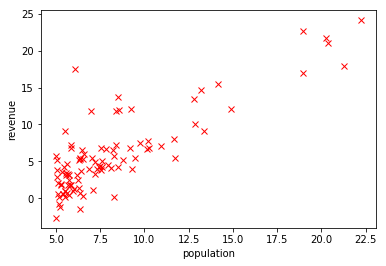

In [6]:
# plot data
plotData(X,y)

## Gradient Descent

In [7]:
# computecost compute cost for liear regression
def computecost(X,y,theta):
    m = len(y)
    J = 0
    diff = np.dot(X,theta) - y
    J = np.dot(diff.transpose(),diff)
    J = J/(2*m)
    return J

In [8]:
# gradientDescent performs gradient descent to learn theta
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history  = np.zeros([num_iters,1])
    for iter in range(num_iters):
        D = np.dot(X,theta) - y
        coe = alpha/m
        theta_temp = np.zeros([2,1])
        theta_temp = theta - coe*np.dot(X.transpose(),D)
        theta = theta_temp
        J_history[iter][0] = computecost(X,y,theta)
    return theta, J_history

In [9]:
# Add a column of ones to x
X_withones = np.append(np.ones([m,1]), X, 1)
theta = np.zeros([2,1])

In [10]:
# compute and display initial cost
J = computecost(X_withones,y,theta)
print('the initial value of cost function is {}'.format(J[0][0]))

the initial value of cost function is 32.0727338775


In [11]:
# run gradient descent
theta, J_history = gradientDescent(X_withones,y,theta,0.01,1500)

In [12]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [13]:
print('Theta found by gradient descent: ')
print(theta[0][0])
print(theta[1][0])

Theta found by gradient descent: 
-3.63029143940436
1.166362350335582


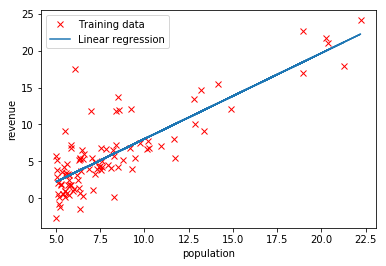

In [14]:
# Plot the linear fit
plt.plot(X,y,'rx')
plt.xlabel('population')
plt.ylabel('revenue')
plt.plot(X,np.dot(X_withones,theta),'-')
plt.legend(['Training data','Linear regression'])
plt.show()

In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1,3.5]),theta)[0]
predict2 = np.dot(np.array([1,7]),theta)[0]
print('For population = 35,000, we predict a profit of {}\n'.format(predict1*10000))
print('For population = 70,000, we predict a profit of {}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.7678677

For population = 70,000, we predict a profit of 45342.4501294



## Visualizing J(theta_0, theta_2)

In [16]:
#  Grid over which we will calculate J
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
# initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals),len(theta1_vals)])

In [17]:
# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]],[theta1_vals[j]]])
        J_vals[i][j] = computecost(X_withones,y,t)

In [18]:
from mpl_toolkits.mplot3d import Axes3D

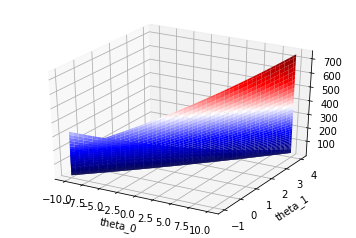

In [19]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.transpose(),cmap = 'seismic')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
plt.show()

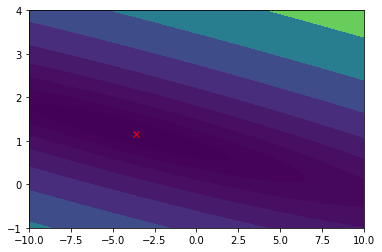

In [20]:
# countour plot
levels = np.logspace(-2, 3, 20)
plt.contourf(theta0_vals, theta1_vals, J_vals.transpose(),levels = levels,colors=None)
plt.plot(theta[0],theta[1],'rx')
plt.show()